In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
analyzer=SentimentIntensityAnalyzer()
analyzer.polarity_scores('I love it')['compound']

0.6369

In [12]:
test=pd.read_excel('Data/Comments.xlsx')

In [13]:
doc=pd.DataFrame([])
for i in range(test.shape[0]):
    doc=doc.append(pd.DataFrame(analyzer.polarity_scores(test['Comment'][i]),index=[0]))

In [14]:
test['Comment'][2]

'Part 1 :Blank Space<br />Part 2 :Me! <br />Just notice.'

In [15]:
test['Polarity']=doc['compound'].reset_index(drop=True)
test.head()

,Video Title,Comment,CommentID,Author,Replies,Likes,Polarity
0,Taylor Swift - Blank Space,i love,Ugy-PtcBo7vqVTrEXHt4AaABAg,Nzuzi Mukinayi,0,0,0.6369
1,Taylor Swift - Blank Space,Bart Baker&#39;s parody is better,UgzpviQOjx1-uTS6XP94AaABAg,Blue_ Danu,0,0,0.4404
2,Taylor Swift - Blank Space,Part 1 :Blank Space<br />Part 2 :Me! <br />Jus...,Ugyf1Jy65j0jckmFbNZ4AaABAg,Mary Villanueva,0,0,0.0000
3,Taylor Swift - Blank Space,😑😐🤔🤔🤔🤔🤔🤔🤔🤔🤔😣😥😶😮🤔🤔🥉🥉🚼🚻🚺🚹,Ugy3-38V-k8RZgxZJBl4AaABAg,Bertha Perez,0,0,0.0000
4,Taylor Swift - Blank Space,"2020 <a href=""https://www.youtube.com/watch?v=...",UgxiBHYbr4Sjoa39NmV4AaABAg,WEST L I F E LOVER,0,0,0.5473


In [19]:
filt= test['Polarity']<0
test.loc[filt,['Comment','Polarity']].tail()

,Comment,Polarity
4920,CPU&#39;s assosiated with Taylor Swift are LAME,-0.4084
4923,I trashed boyfriends car years ago and still f...,-0.2263
4945,No one:<br />Nobody ever:<br />Me:she is stand...,-0.2960
4965,I’m upsets with three swit,-0.3612
4968,Oh Taylor swift you dated too many boys and br...,-0.2500


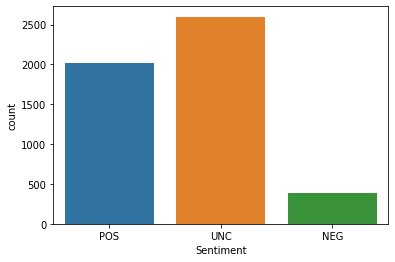

In [34]:
test['Sentiment']=np.where(test['Polarity']==0,'UNC',np.where(test['Polarity']>0,'POS','NEG'))
sns.countplot(test['Sentiment'])